1. Explain succinctly in your own words (but working with a ChatBot if needed)...


1: the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former

    The Simple Linear Regression models the relationship between a single predictor variable an an outcome variable, while the Multiple Linear Regression models the relationship between multiple predictor variable and an outcome variable. The Multiple Linear Regression can provide a more accurate prediction of the outcome since it covers more variables that might have an effect on the outcome variable.

2: the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms

    A continuous variable represents a numeric variable with a range of possible values. It can be represented as outcome = β_0 + β_1 x (continuous predictor). An indicator variable represents a categorical variable that indicates the presense of a characteristic. It can be represented as outcome = β_0 + β_1 x 1(indicator predictor).

3: the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)

    When a single indicator variable and a continuous variable are used together in a Multiple Linerar Regression, the continuous variable influences the outcome of the model while the indicator variable makes the intercept to differ for the groups. It can be represented as outcome = β_0 + β_1 x (continuous predictor) + β_2 x 1(indicator predictor).

4: the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form
    
    Adding an interaction between a continuous variable and an indicator variable allows the model to estimate a different slope for the continuous variable across levels of the indicator variable. It can be represented as outcome = β_0 + β_1 x (continuous predictor) + β_2 x 1(indicator predictor) + β_3 x Continuous Predictor x 1(Indicator Predictor). β_3 here represents the change in the slope of the continuous predictor for the group indicated by the indicator variable.

5: the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes

    When non-binary categorical variable is used in a multiple linear regression model, it is represented by indicator variables for each category, minus one to avoid redundancy. This approach uses "number of categories minus one" indicator variables, where one group serves as the baseline for comparison. It is represented by outcome = β_0 + β_1 x (Category1) + β_2 x 1(Category2) + ...β_k-1 x 1(Categoryk-1). When using a non-binary categorical variable in a Multiple Linear Regression (MLR) model, it must be transformed into binary (indicator) variables to fit the model’s linear structure.

2. Explain in your own words (but working with a ChatBot if needed) what the specific (outcome and predictor) variables are for the scenario below; whether or not any meaningful interactions might need to be taken into account when predicting the outcome; and provide the linear forms with and without the potential interactions that might need to be considered

    Imagine a company that sells sports equipment. The company runs advertising campaigns on TV and online platforms. The effectiveness of the TV ad might depend on the amount spent on online advertising and vice versa, leading to an interaction effect between the two advertising mediums.

1: Explain how to use these two formulas to make predictions of the outcome, and give a high level explaination in general terms of the difference between predictions from the models with and without the interaction

    The model without interaction can be represented as sales = β_0 + β_1 x (TVBudget) + β_2 x (OnlineBudget). The model with interaction can be represented as sales = β_0 + β_1 x (TVBudget) + β_2 x (OnlineBudget) + β_3 x (TVBudget x OnlineBudget). We plug in the budgets and the values for the coefficients to get the sales. For the model without interaction, we assume that the two budgets does not affect each other, while for the model with interactions, we see a more complex relationship where the budgets depend on each other.

2: Explain how to update and use the implied two formulas to make predictions of the outcome if, rather than considering two continuous predictor variables, we instead suppose the advertisement budgets are simply categorized as either "high" or "low" (binary variables)

    For the model without interaction, the linear form is changed to sales = β_0 + β_1 x 1(TVHigh) + β_2 x 1(OnlineHigh), where 1 is high for both predictor.  For the model with interaction, the linear form is changed to sales = β_0 + β_1 x 1(TVHigh) + β_2 x 1(OnlineHigh) + β_3 x (1(TVHigh) x 1(OnlineHigh)), where 1 is high for both predictor.

https://chatgpt.com/share/673276bb-3eb0-8001-9e81-02d658edb79f

3. Use smf to fit multiple linear regression models to the course project dataset from the canadian social connection survey

Optimization terminated successfully.
         Current function value: 0.665738
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:     high_conscientious   No. Observations:                 2229
Model:                          Logit   Df Residuals:                     2225
Method:                           MLE   Df Model:                            3
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.03485
Time:                        21:54:59   Log-Likelihood:                -1483.9
converged:                       True   LL-Null:                       -1537.5
Covariance Type:            nonrobust   LLR p-value:                 4.502e-23
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                 

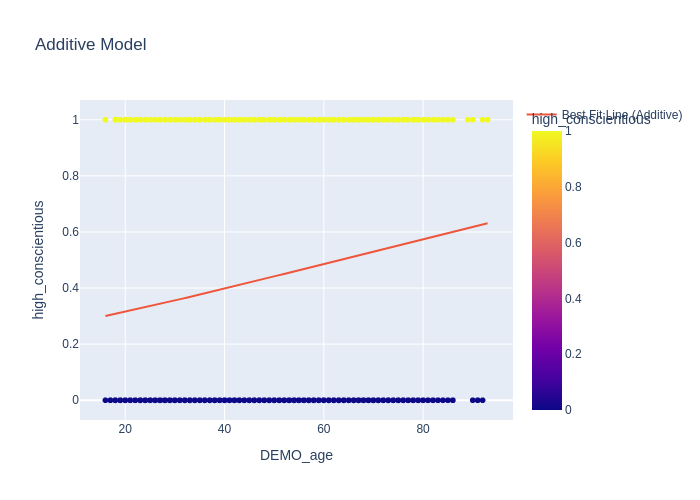

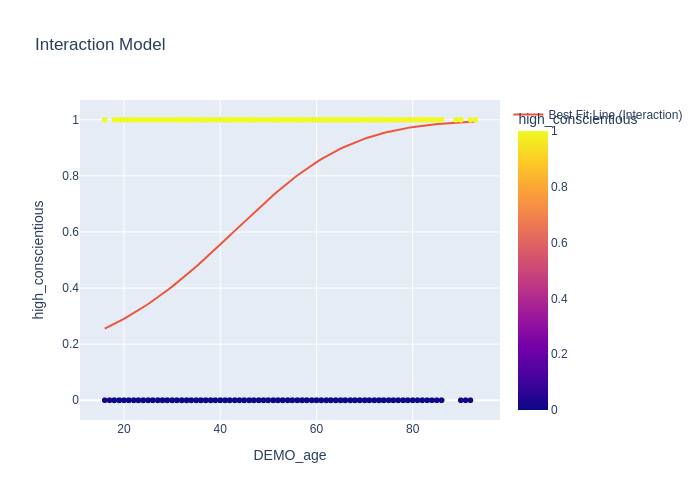

In [22]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import plotly.express as px

# Load and clean data
data = pd.read_csv('CSCS_data_anon.csv', low_memory=False)  # Update with actual path
data_cleaned = data[['DEMO_age', 'PSYCH_big_five_inventory_conscientious_score', 
                     'PSYCH_big_five_inventory_extraverted_score']].dropna()

# Create binary outcome variable (high conscientiousness)
median_conscientiousness = data_cleaned['PSYCH_big_five_inventory_conscientious_score'].median()
data_cleaned['high_conscientious'] = (data_cleaned['PSYCH_big_five_inventory_conscientious_score'] > median_conscientiousness).astype(int)

# Add interaction term
model_specification = 'high_conscientious ~ DEMO_age * PSYCH_big_five_inventory_extraverted_score'
log_reg_model_interaction = smf.logit(model_specification, data=data_cleaned).fit()

# Display the model summary
print(log_reg_model_interaction.summary())

# Interpret as if linear regression:
# - Each coefficient describes the additive and interaction effects on "high_conscientious" as if it were linear.
# - Use p-values to discuss significance.

# Visualization for (a) additive and (b) interaction effects

# Simulate data for visualization
predictor_values = np.linspace(data_cleaned['DEMO_age'].min(), data_cleaned['DEMO_age'].max(), 100)
simulated_data = pd.DataFrame({
    'DEMO_age': predictor_values,
    'PSYCH_big_five_inventory_extraverted_score': np.median(data_cleaned['PSYCH_big_five_inventory_extraverted_score'])
})
simulated_data['predicted_prob_additive'] = log_reg_model_interaction.predict(simulated_data)

# (a) Plot additive model
fig_additive = px.scatter(data_cleaned, x='DEMO_age', y='high_conscientious', 
                          title="Additive Model", color='high_conscientious')
fig_additive.add_scatter(x=simulated_data['DEMO_age'], y=simulated_data['predicted_prob_additive'],
                         mode='lines', name="Best Fit Line (Additive)")
fig_additive.show(renderer="png")

# (b) Interaction model visualization
simulated_data['PSYCH_big_five_inventory_extraverted_score'] = predictor_values
simulated_data['predicted_prob_interaction'] = log_reg_model_interaction.predict(simulated_data)

fig_interaction = px.scatter(data_cleaned, x='DEMO_age', y='high_conscientious', 
                             title="Interaction Model", color='high_conscientious')
fig_interaction.add_scatter(x=simulated_data['DEMO_age'], y=simulated_data['predicted_prob_interaction'],
                            mode='lines', name="Best Fit Line (Interaction)")
fig_interaction.show(renderer="png")

# Commenting on Interaction Necessity:
# - Compare the two plots: If the interaction line diverges significantly, this suggests a synergy.
# - Discuss whether the interaction term meaningfully improves the model's prediction.


4. Explain the apparent contradiction between the factual statements regarding the fit below that "the model only explains 17.6% of the variability in the data" while at the same time "many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'"

    R-squared tells us how much of HP’s total variation is explained by the model while P-values tell us if individual predictors have a meaningful effect on HP. the low R-squared value tells us that only 17.6% of the variation in HP is captured by this model, meaning that other factors contributes to the variation a lot. But we can still have a very small p-value that represents a strong or very strong evidence against the null hypothesis of 'no effect'", because within the vatiation that is covered, individual predictors can still have a significant effect on HP.

In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:57:04   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5. Discuss the following (five cells of) code and results with a ChatBot and based on the understanding you arrive at in this conversation explain what the following (five cells of) are illustrating

    1: In this cell, we did data splitting and preparation. We replace the missing values with None, fixed a random seed to make the results reproducible, and then split the data for further analysis.

    2: Specifies an ordinary least squares (OLS) regression model, with HP as the dependent variable and Attack and Defense as the independent variables, then fit the model to minimize the residual sum of squares, and provides a comprehensive summary of the model.

    3: Computes and compares in-sample and out-of-sample R-squared values to help determine if the model is overfitting or if it has strong generalizability.

    4: Creates and fits a complex linear regression model with multiple interaction terms. It demonstrates how adding multiple interactions in a regression model can reveal complex relationships but also highlights the risks of high-dimensional modeling.

    5: Computes and compares the in-sample and out-of-sample R-squared values for the more complex model. It demonstrates that adding multiple interaction terms can improve in-sample fit but also risks reducing out-of-sample performance if the model becomes too complex.
    
https://chatgpt.com/share/67328722-723c-8001-8972-83be1babd268

6. Work with a ChatBot to understand how the model4_linear_form (linear form specification of model4) creates new predictor variables as the columns of the so-called "design matrix" model4_spec.exog (model4_spec.exog.shape) used to predict the outcome variable model4_spec.endog and why the so-called multicollinearity in this "design matrix" (observed in np.corrcoef(model4_spec.exog)) contribues to the lack of "out of sample" generalization of predictions from model4_fit; then, explain this consisely in your own works

    The model4_linear_form formula creates new predictor variables by centering and scaling individual variables and generating interaction terms among them. These predictor variables become columns in the design matrix, which the model uses to predict the outcome. Multicollinearity in the design matrix means that several predictor variables are highly correlated with each other, it creates instability in the model by making it overly sensitive to specific patterns in the training data. This sensitivity reduces the model’s ability to generalize, leading to poor performance on new, unseen data.

https://chatgpt.com/share/6732894e-52c0-8001-a4f6-af2e5513a646

7. Discuss with a ChatBot the rationale and principles by which model5_linear_form is extended and developed from model3_fit and model4_fit; model6_linear_form is extended and developed from model5_linear_form; and model7_linear_form is extended and developed from model6_linear_form; then, explain this breifly and consisely in your own words

    The model is exteded and developed by adding and removing variables and interactions to try to improve the model's predictive power, which is tested based on hypothesis testing and performance evaluation. Variables that shows consistent association will be retained, and variables that are not valuable will be discarded.
    
https://chatgpt.com/share/67328b73-331c-8001-9661-c9bd23240b91

8. Work with a ChatBot to write a for loop to create, collect, and visualize many different paired "in sample" and "out of sample" model performance metric actualizations (by not using np.random.seed(130) within each loop iteration); and explain in your own words the meaning of your results and purpose of this demonstration

    The main purpose of this demonstration is to test the reliability of the model and see if it provides consistent, generalizable predictions across multiple data splits. By comparing these in-sample and out-of-sample results, we can determine if our model is reliable and can make accurate predictions on new, unseen data.
    
https://chatgpt.com/share/6732894e-52c0-8001-a4f6-af2e5513a646

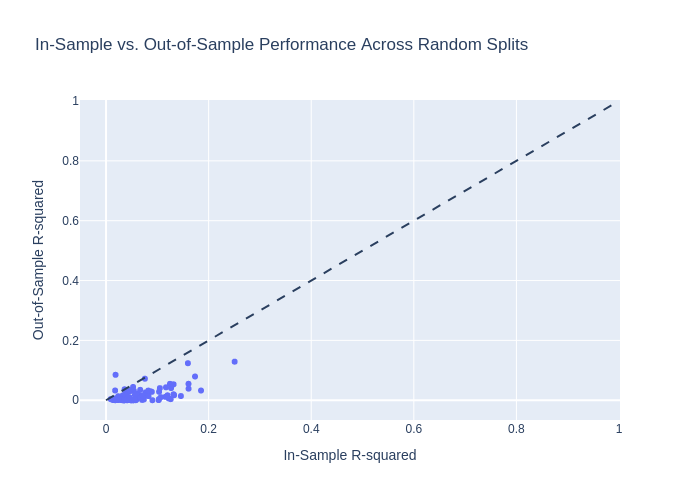

In [26]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from sklearn.model_selection import train_test_split

# Create a synthetic dataset with columns similar to the ones needed
np.random.seed(42)
num_samples = 100  # You can adjust this number
songs = pd.DataFrame({
    'danceability': np.random.rand(num_samples),
    'energy': np.random.rand(num_samples),
    'loudness': np.random.rand(num_samples) * 10 - 5,  # Scale and shift for variation
    'mode': np.random.choice([0, 1], num_samples)  # Binary variable
})

# Parameters
reps = 100
in_sample_Rsquared = np.array([0.0] * reps)
out_of_sample_Rsquared = np.array([0.0] * reps)

# Model specification
linear_form = 'danceability ~ energy * loudness + energy * mode'

for i in range(reps):
    # Random 50-50 train-test split
    songs_training_data, songs_testing_data = train_test_split(songs, train_size=0.5)
    
    # Fit the model on the training data
    final_model_fit = smf.ols(formula=linear_form, data=songs_training_data).fit()
    
    # Store the in-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Calculate and store the out-of-sample R-squared
    out_of_sample_Rsquared[i] = np.corrcoef(
        songs_testing_data['danceability'], 
        final_model_fit.predict(songs_testing_data)
    )[0, 1] ** 2

# Create a DataFrame to store the results
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Scatter plot of in-sample vs. out-of-sample performance
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)",
                 title="In-Sample vs. Out-of-Sample Performance Across Random Splits",
                 labels={"In Sample Performance (Rsquared)": "In-Sample R-squared", 
                         "Out of Sample Performance (Rsquared)": "Out-of-Sample R-squared"})
# Add a reference line y=x to compare in-sample and out-of-sample equality
fig.add_shape(type="line", x0=0, y0=0, x1=1, y1=1, line=dict(dash="dash"))

fig.show(renderer="png")


9. Work with a ChatBot to understand the meaning of the illustration below; and, explain this in your own words

    The illustration below explores the trade-offs between model6_fit and the more complex model7_fit. 
    Model7_fit is a more complex model and contains additional interaction terms, which makes it better at capturing more complex patterns in the training data. Model6_fit is more simple and easier to interpret in terms of understanding the impact of each predictor. 
    Generalizability is the model's ability to perform well on new, unseen data, and model6_fit tends to generalize better than model7_fit, since model7_fit is likely to capture patterns that do not exist, leading to overfitting.
    In terms of interpretability, even though model7_fit has slightly better performance on out-of-sample data, its complexity reduces its interpretability.
    The code comparing each model’s in-sample and out-of-sample performance across different data segments, illustrates that, while model7_fit may initially show better "in-sample" fit, its "out-of-sample" performance tends to drop more when applied to future data generations due to it's complexity, while model6_fit retains a more stable performance.
    
https://chatgpt.com/share/6732941b-4f94-8001-8b9f-847b41b44002